In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set folder path
obs_folder = './s_station_1hr'      # Folder with files like Badgerys_Creek_obs.csv
mod1_folder = './s_germany_node_hourly/z10'# Folder with files like germany_node_Badgerys_Creek_AWS_z10.csv
mod2_folder = './s_UK_node/z10'

# Get all model files
model1_files = [f for f in os.listdir(mod1_folder) if f.endswith('.csv')]
#folder_path = 'home/s_germany_node_hourly/z10'  # Replace with your folder path



# Identify station names based on file name patterns
stations = sorted(set(f.split('_')[0] for f in model1_files if f.endswith('_z10.csv')))


# Set up subplots
n_stations = len(stations)
ncols = 3
nrows = (n_stations + ncols - 1) // ncols



In [5]:
stations

['badgery', 'bankstown', 'norah', 'richmond', 'sydney']

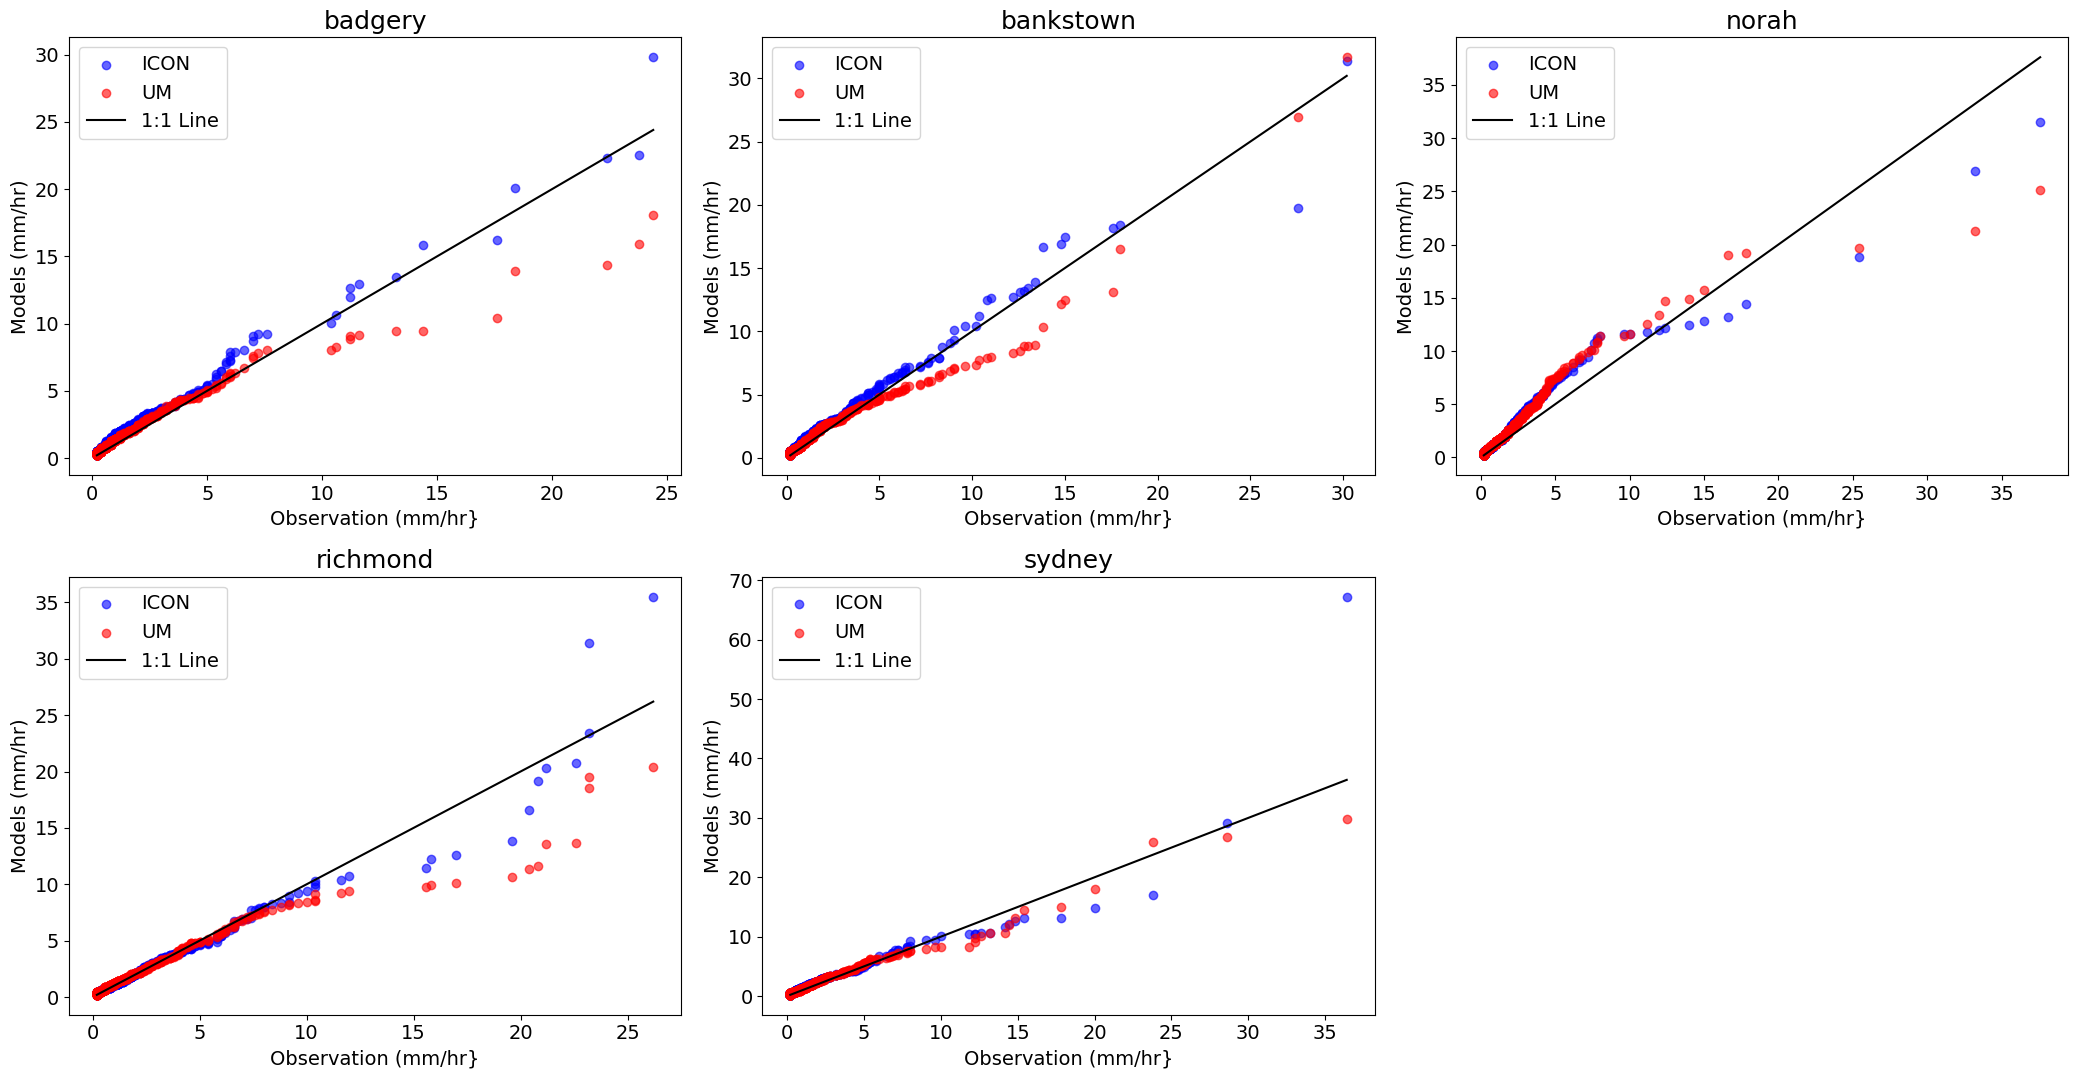

In [31]:
n_stations = len(stations)
ncols = 3
nrows = (n_stations + ncols - 1) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7 * ncols, 5.5 * nrows))
#fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols, 4.5 * nrows))
axes = axes.flatten()

#### size of figures and text inside plot
import matplotlib
import matplotlib.pyplot as plt


matplotlib.rcParams.update({
    'font.size': 14,           # Default font size
    'axes.titlesize': 16,      # Title of each subplot
    'axes.labelsize': 14,      # X and Y axis labels
    'xtick.labelsize': 14,     # X tick labels
    'ytick.labelsize': 14,     # Y tick labels
    'legend.fontsize': 14      # Legend text
})

for i, station in enumerate(stations):
    obs_path = os.path.join(obs_folder, f'{station}_1h.csv')
    mod1_path = os.path.join(mod1_folder, f'{station}_z10.csv')
    mod2_path = os.path.join(mod2_folder, f'{station}_z10.csv')

    if not os.path.exists(obs_path):
        print(f'⚠️ Missing obs file: {obs_path}')
        continue
    if not os.path.exists(mod1_path) or not os.path.exists(mod2_path):
        print(f'⚠️ Missing model file for station: {station}')
        continue

    # Load data
    obs = pd.read_csv(obs_path).select_dtypes(include='number').iloc[:, 0].dropna().reset_index(drop=True)
    mod1 = pd.read_csv(mod1_path).select_dtypes(include='number').iloc[:, 0].dropna().reset_index(drop=True)
    mod2 = pd.read_csv(mod2_path).select_dtypes(include='number').iloc[:, 0].dropna().reset_index(drop=True)

    # Align and mask
    obs_mask=(obs >= 0.2)
    mod1_mask= (mod1 >= 0.2)
    mod2_mask=(mod2>=0.2)
    obs_filted=obs[obs_mask]
    mod1_filted=mod1[mod1_mask]
    mod2_filted=mod2[mod2_mask]


    
    
    ## final lenght 
    final_len = min(len(obs_filted), len(mod1_filted), len(mod2_filted))
    obs = obs_filted[:final_len]
    mod1 = mod1_filted[:final_len]
    mod2 = mod2_filted[:final_len]

    # Plot
    ax = axes[i]
    ax.scatter(sorted(obs), sorted(mod1), alpha=0.6, label='ICON', color='blue')
    ax.scatter(sorted(obs), sorted(mod2), alpha=0.6, label='UM', color='red')
    ax.plot([obs.min(), obs.max()], [obs.min(), obs.max()], 'black', label='1:1 Line')
    ax.set_title(station.replace('_', ' '), size=18)
    ax.set_xlabel('Observation (mm/hr}')
    ax.set_ylabel('Models (mm/hr)')
    ax.legend(fontsize=14)

# Hide unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('Sydney_QQ_hr_precip_plots.png', dpi=300, bbox_inches='tight')
plt.show()
